# Proyecto Final

La finalidad de este proyecto es enfrentar a los estudiantes a problemas de Machine Learning con todas las etapas (típicas) que eso implica. Basándose en cada uno de los módulos del curso a lo largo del semestre es posible tener abarcar estas etapas, dando pie a la investigación y a la solución de problemas operacionales que el problema podría poseer inherentemente.

## Entregas

El proyecto consiste de dos notas, el primero reemplaza la nota de la tarea 3.

1. Propuesta de trabajo (viernes 19 de diciembre, 2020)
2. Resultados finales (viernes 8 de enero, 2021)

## Rúbrica

A continuación se detalla la rúbrica de cada entregable

### Propuesta de trabajo

Presentación grupal, puede ser utilizando diapositivas o jupyter lab.

1. Presentación de los datos, definición de variables y contexto de la problemática. (10 puntos)
2. ¿Cuál es la pregunta que desean resolver? (5 puntos)
3. Análisis estadístico de los datos. (15 puntos)
4. Visualización de variables. (15 puntos)
5. ¿Hay que realizar preprocesamiento? (15 puntos)
6. ¿Hay que realizar inputación de datos faltantes? (15 puntos)
7. ¿Hay que realizar balanceo de datos? (15 puntos)
8. Propuesta de cuatro modelos y sus hiperparámetros asociados. (20 puntos)

# Proyecto Final: Entrega 1

[MUSHROOM](https://archive.ics.uci.edu/ml/datasets/Mushroom)

En nuestro proyecto trabajaremos con una data de hongos en las familias [lepiota](https://en.wikipedia.org/wiki/Lepiota) y [agaricus](https://en.wikipedia.org/wiki/Agaricus), que incluye descripción, como veremos, de 22 variables que hablan de su estructura física.

![abalone](../images/Lepiota_clypeolaria.png)

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

from pathlib import Path

alt.themes.enable('opaque')  # Para quienes utilizan temas oscuros en Jupyter Lab
%matplotlib inline

In [14]:
datapath = Path().resolve().parent / "data-mushroom"

mushroom = pd.read_csv(
    datapath / "agaricus-lepiota.data",
    header=None,
    names=["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", 
           "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
           "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type",
           "spore-print-color",  "population" , "habitat"]
)

mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


De al descripción dada se nos presenta el problema de cómo determinar si un especimen es venenoso o comestible, de ahí que nos preguntamos, ¿cómo, a traves de las variables dadas, podemos determinar si una especia lo es o no?  y en el caso de ser muy complejo y no determinante, ¿podemos hacer alguna afirmación como acercamiento al menos?

Por otro lado, investigando un poco los datos nos damos cuenta de que estan todos conformados de forma categórica en todas sus variables.

In [9]:
mushroom.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


además tenemos, en concreto, sus respectivos calisificarores asociados a cada letra en las columnas


| Feature       | Description     |
| :------------- | :----------: |
| cap-shape | bell=b, conical=c, convex=x,flat=f, knobbed=k, sunken=s|
| cap-surface|            fibrous=f,grooves=g,scaly=y,smooth=s|
| cap-color|                brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y|
| bruises?|                 bruises=t,no=f|
| odor|                     almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s|
| gill-attachment|          attached=a,descending=d,free=f,notched=n|
| gill-spacing|             close=c,crowded=w,distant=d|
| gill-size: |               broad=b,narrow=n|
| gill-color|               black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y|
| stalk-shape|              enlarging=e,tapering=t|
| stalk-root:|               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?|
| stalk-surface-above-ring: |fibrous=f,scaly=y,silky=k,smooth=s|
|stalk-surface-below-ring: |fibrous=f,scaly=y,silky=k,smooth=s|
| stalk-color-above-ring: |  brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y|
| stalk-color-below-ring:  | brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y|
| veil-type:    |            partial=p,universal=u|
| veil-color:   |            brown=n,orange=o,white=w,yellow=y|
| ring-number:   |           none=n,one=o,two=t|
| ring-type:     |           cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z|
|spore-print-color: |       black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y|
| population:   |            abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y|
| habitat:     |             grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d|

respecto a las visualizaciones, solo nos interesa contar en cada columna cuanto se repiten los elementos de esta, por lo mismo haremos histogramas para cada columna, diferenciando entre comestible o venenoso, que es información entregada en la primera columan del dataframe `mushroom`

* notar que en `stalk-root` tenemos muchos datos perdidos (2480), marcados con un ?

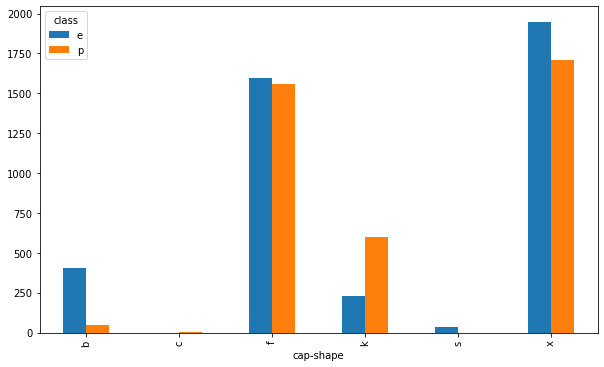

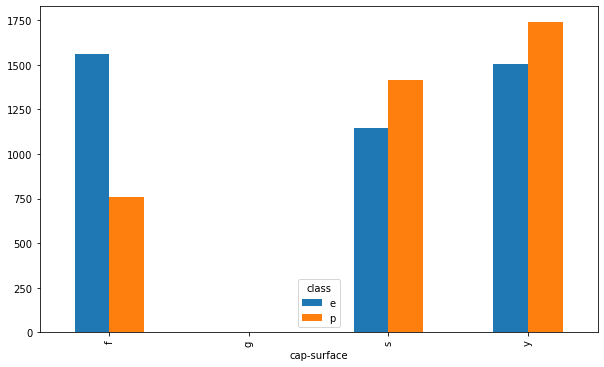

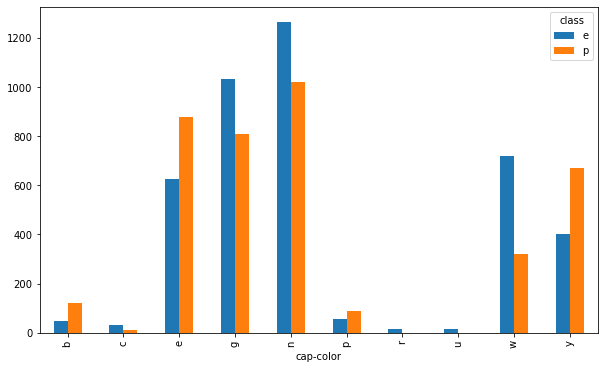

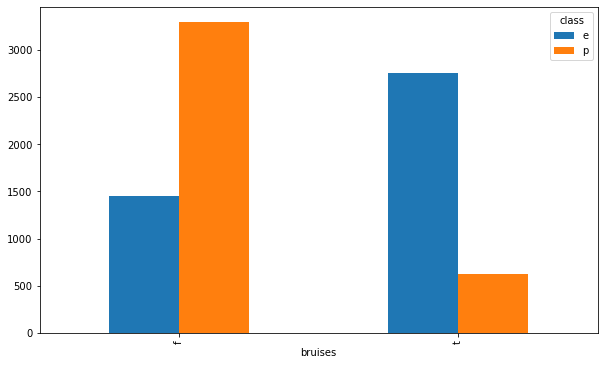

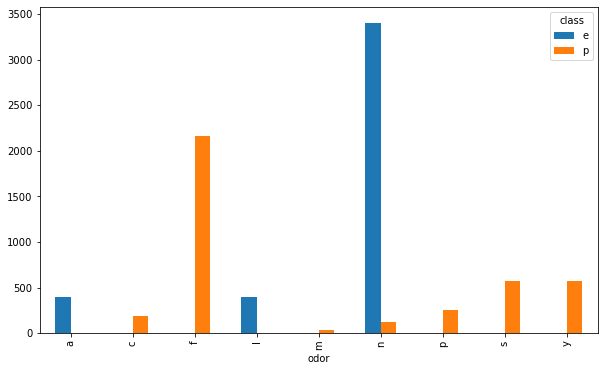

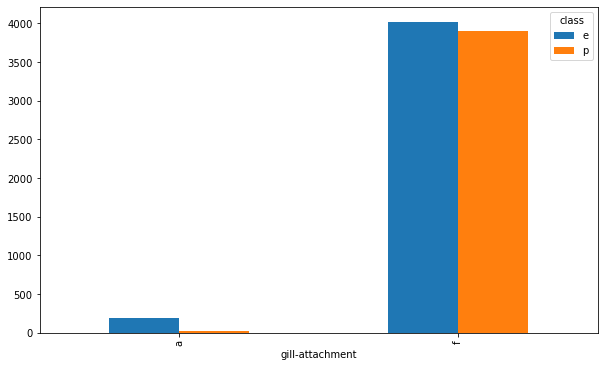

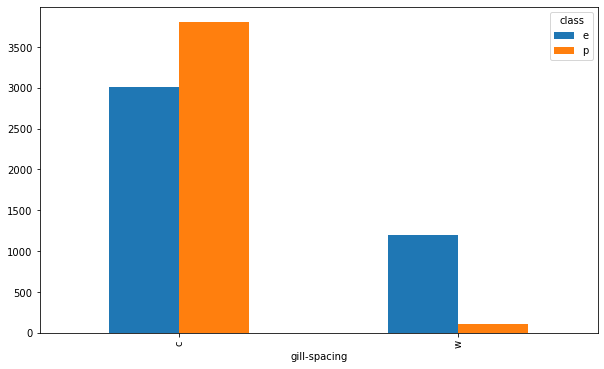

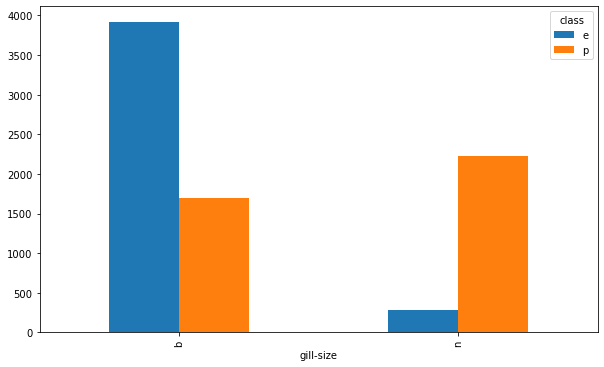

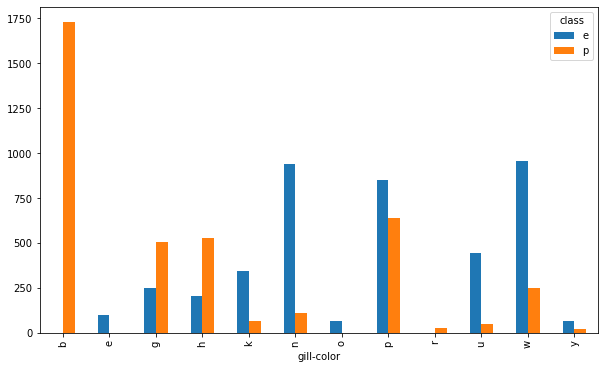

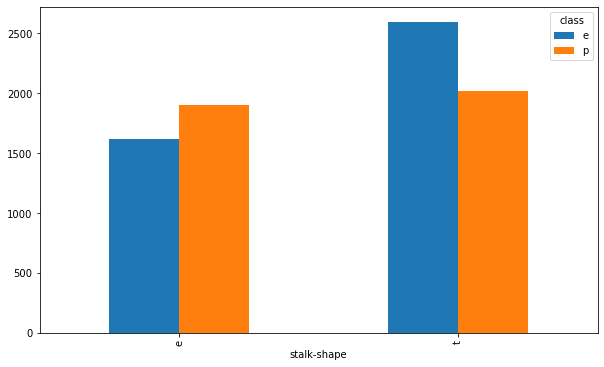

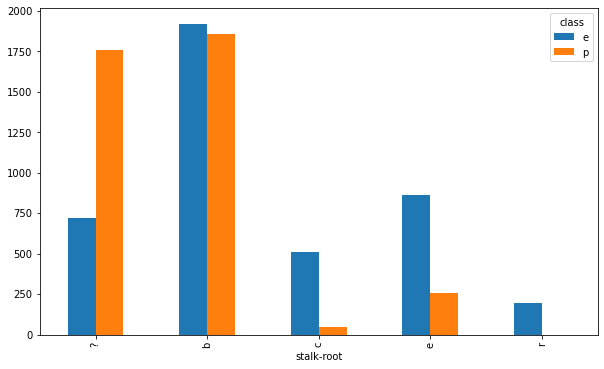

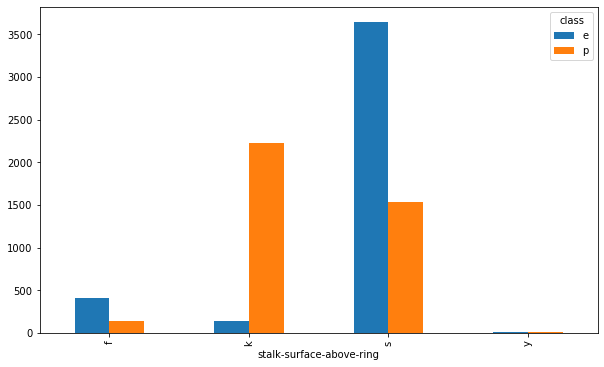

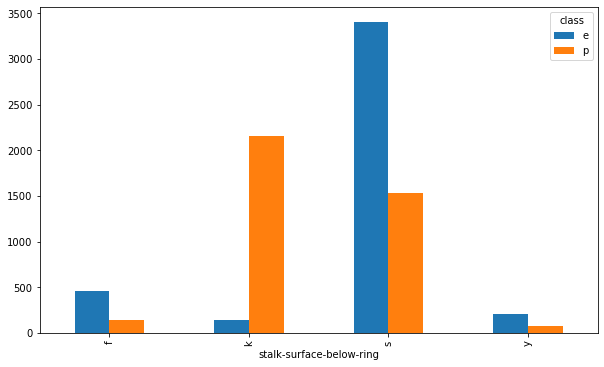

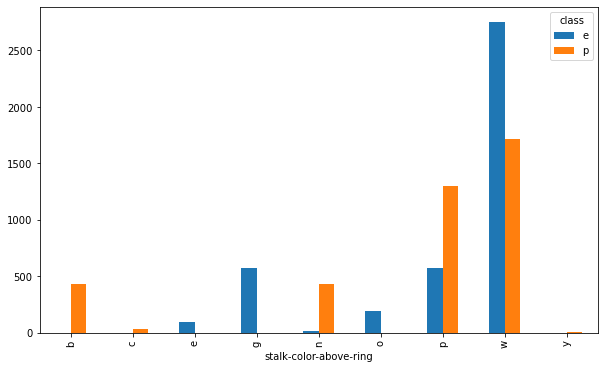

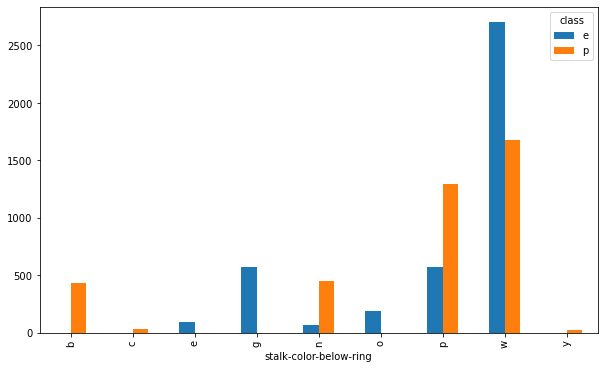

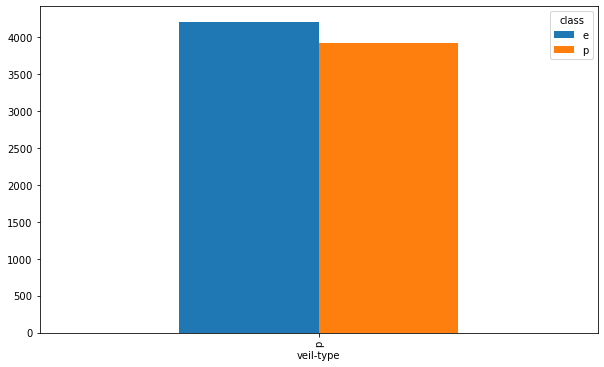

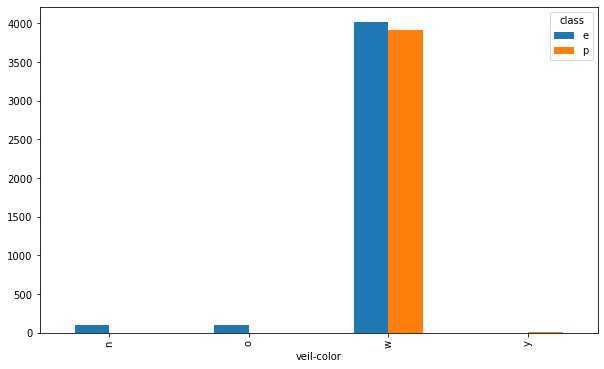

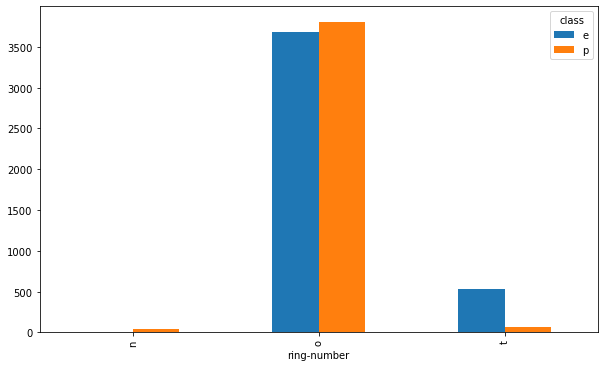

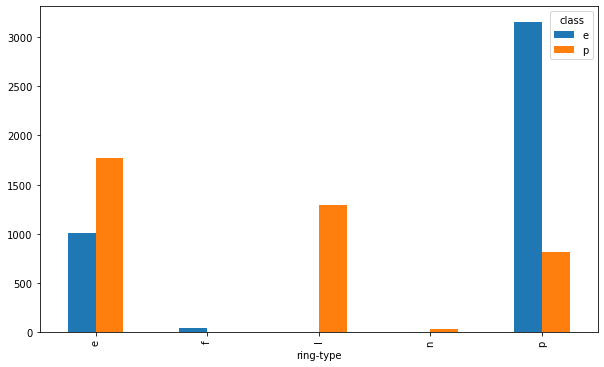

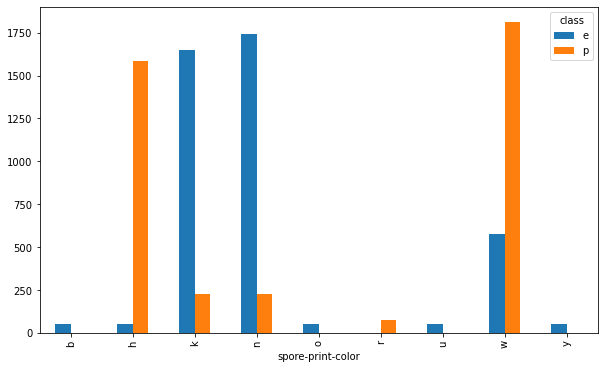

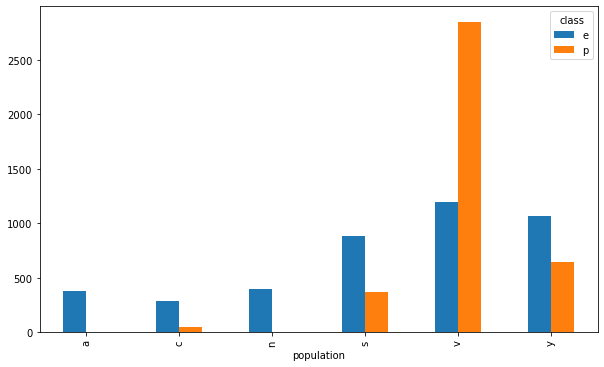

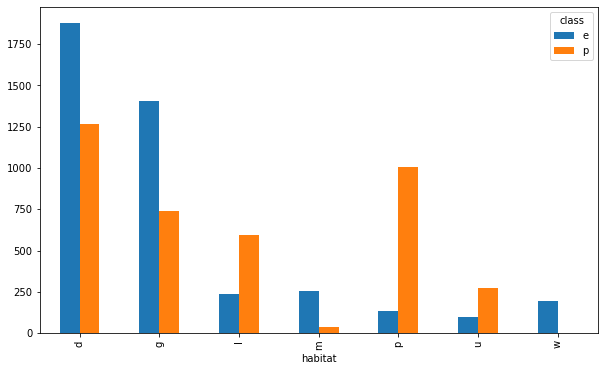

In [134]:
mushroom["count_p_e"] = 1

for j in mushroom.columns.drop(["class","count_p_e"]):
    df = mushroom[["class",j,"count_p_e"]].groupby([j,"class"])["count_p_e"].apply(sum).unstack("class").replace(np.nan,0)
    df = df.reset_index()
    df.plot(x = j,kind='bar',figsize=(10,6));

Respecto al **preprocesamiento**, nos conviene trabajar con datos numéricos ya que las implementaciones que hemos visto funcionan con esta condición, además de que veremos una v

In [156]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in mushroom.columns:
    mushroom[col] = le.fit_transform(mushroom[col])
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,count_p_e
0,1,5,2,4,1,6,1,0,1,4,...,7,7,0,2,1,4,2,3,5,0
1,0,5,2,9,1,0,1,0,0,4,...,7,7,0,2,1,4,3,2,1,0
2,0,0,2,8,1,3,1,0,0,5,...,7,7,0,2,1,4,3,2,3,0
3,1,5,3,8,1,6,1,0,1,5,...,7,7,0,2,1,4,2,3,5,0
4,0,5,2,3,0,5,1,1,0,4,...,7,7,0,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,5,5,0,1,1,4,0,1,2,0
8120,0,5,2,4,0,5,0,0,0,11,...,5,5,0,0,1,4,0,4,2,0
8121,0,2,2,4,0,5,0,0,0,5,...,5,5,0,1,1,4,0,1,2,0
8122,1,3,3,4,0,8,1,0,1,0,...,7,7,0,2,1,0,7,4,2,0


con esto hecho podemos visualizar cómo se vería una interpretación numérica un poco más amigable que lo anterior

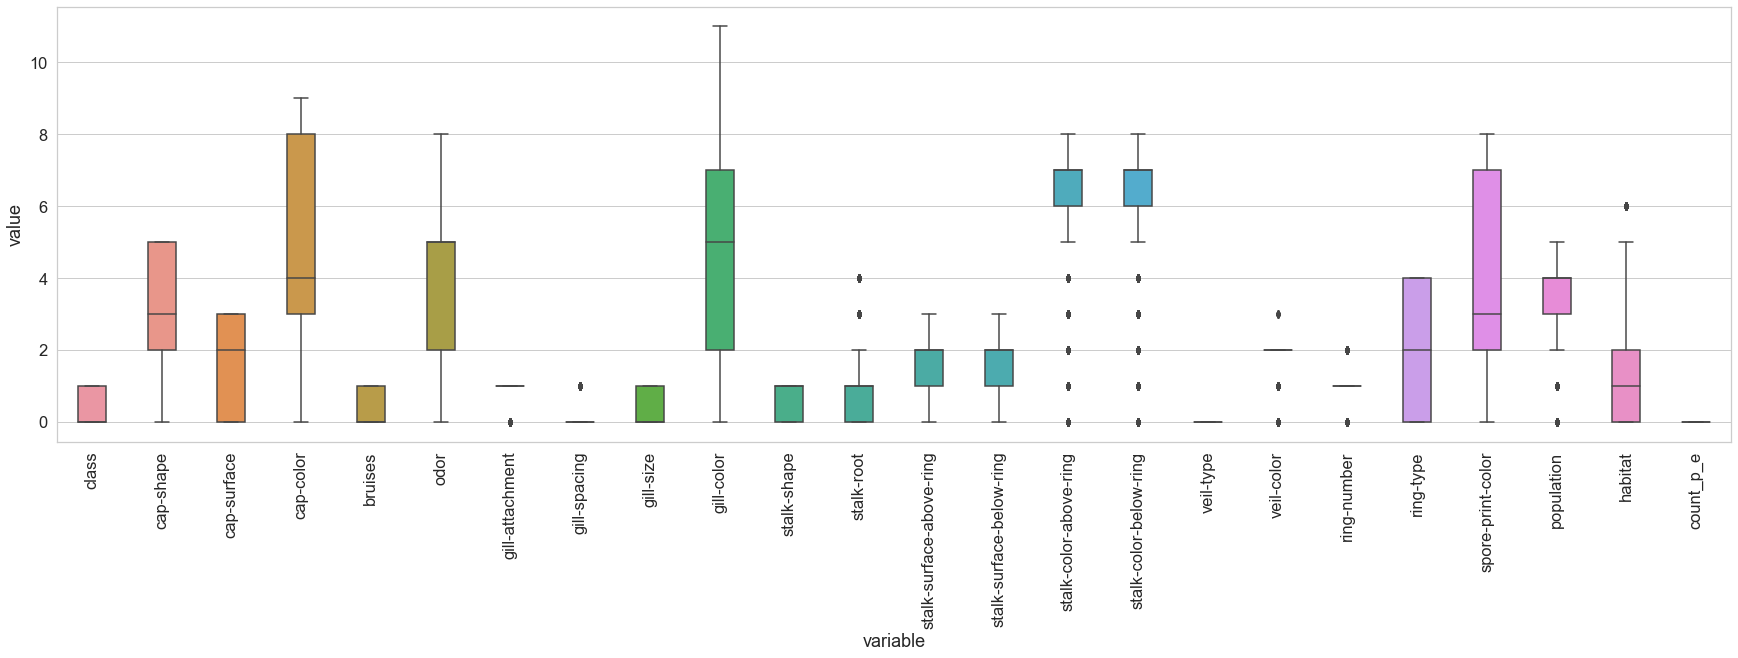

In [175]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(30,8)}, font_scale=1.5, style='whitegrid')

sns.boxplot(x="variable", y="value", data=pd.melt(mushroom), width=0.4)
plt.xticks(rotation=90)

plt.show()

No es necesario **preprocesar** ya que tenemos elementos solo nominales y en caso de que llegacemos a traducirlo en forma numérica estos no tiene interpretación para determinar si uno es mayor que otro. Respecto a la **inputación**, tenemos que hacer algo con las filas que contienen un dato perdido en al columna 11, `stalk-root` ya que representan 1/4 de los datos:

* rellenar con algún valor fijo (como la moda) no es una buena opción ya que estariamos cargando 1/4 de los datos a una opción, recordemos que son 2480 registros con valor perdido.
* eliminar las 2480 filas no parece una buena opción ya que esto corresponde a solo una columan de 22 y hay mucha información relevante en esas 21 variables faltantes.
* opción 1: podriamos considerarlo como una categoría más. En el caso de ser concluyente en el análisis cambiariamos de criterio.
* opción 2: (un poco más complejo) realizar una "regresión" con la colummna 11 como target. Tenemos 3/4 de los datos para entrenar, lo que entra dentro de un rango efectivo. También hay otros métodos más rebuscados, EM,etc pero están conceptualmente fuera de lo trabajado [Techniques of dealing with missing data](https://en.wikipedia.org/wiki/Missing_data#Techniques_of_dealing_with_missing_data).

Podemos ver de forma exhaustiva con ayuda del `.describe` que las columnas solo tienen los elementos que deberían tener. A parte de esto no tenemos elemento nulos.

In [154]:
mushroom.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
count_p_e                   0
dtype: int64

Por la siguiente casilla, notemos que hay una diferencia de un 3.6% respecto al total de datos, lo que no es tan significante. Aún así quisieramos tener más precisión ya que lo que buscar es obtener algun indicio de qué elementos son venenosos, no así tan importante si es comestible y lo es efectivamente. Entonces quisieramos balancear la data al menos en un 50%-50%

In [151]:
mushroom.groupby('class').sum()

,count_p_e
class,
e,4208
p,3916


In [153]:
mushroom.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
count_p_e                   0
dtype: int64